# I.  test the incompressible shear wave in shearing sheet

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [48]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pylab

In [50]:
t1,v1 = np.loadtxt('../athena4.0/shwave.r64/absvx.tab',unpack=True)
t1_128,v1_128 = np.loadtxt('../athena4.0/shwave.r128/absvx.tab',unpack=True)
t0,v0 = np.loadtxt('../develop/bin/shwave.r64/absvx.tab',unpack=True)
#t0_new,v0_new = np.loadtxt('../develop_bvals/bin/shwave/absvx.tab',unpack=True)
t0_128,v0_128 = np.loadtxt('../develop/bin/shwave.r128/absvx.tab',unpack=True)


# 3D new athena++
t0_3d,v0_3d = np.loadtxt('../athena/bin/shwave.r64/absvx.tab',unpack=True)
t1_3d,v1_3d = np.loadtxt('../athena/bin/shwave.r128/absvx.tab',unpack=True)
t2_3d,v2_3d = np.loadtxt('../athena/bin/shwave.vartime/absvx.tab',unpack=True)



#t2,v2 = np.loadtxt('../athena4.0/shwave.cn0.2/absvx.tab',unpack=True)

t2,v2 = np.loadtxt('../athena4.0/hgb.omg1/absvx.tab',unpack=True)
t2_128,v2_128 = np.loadtxt('../athena4.0/hgb.omg1.r128/data/absvx.tab',unpack=True)
t3,v3 = np.loadtxt('../athena4.0/hgb.omg1.vl2p/absvx.tab',unpack=True)

## 1. wave amplitude vs. time

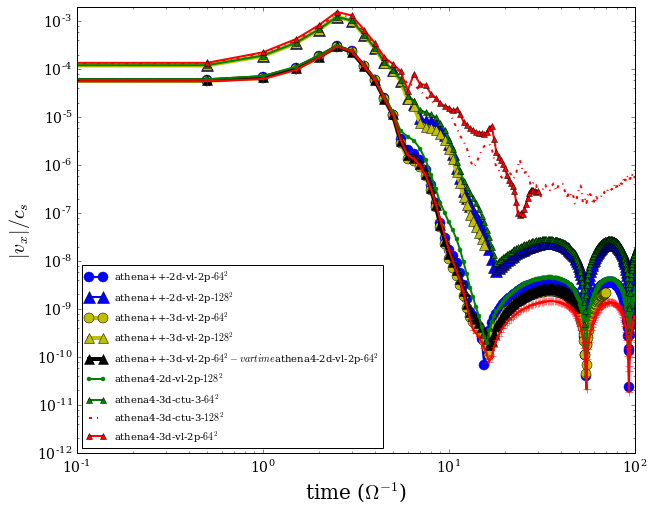

In [53]:
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

## 2d athena++
plt.plot(t0*2*np.pi,v0,'b.-',markersize=20) # athena++
plt.plot(t0_128*2*np.pi,v0_128,'b^-',markersize=12) # athena++

##  new athena++ 3d 
plt.plot(t0_3d*2*np.pi,v0_3d,'yo-',markersize=10,linewidth=4) # athena++
plt.plot(t1_3d*2*np.pi,v1_3d,'y^-',markersize=10,linewidth=4)
plt.plot(t2_3d*2*np.pi,v2_3d,'k^-',markersize=10,linewidth=4)

plt.plot(t1/1000.,v1*1e3,'g.-',markersize=8)   # athena4 2d vl2p
plt.plot(t1_128/1000.,v1_128*1e3,'g-^',markersize=6)   # athena4 2d vl2p r128
plt.plot(t2,v2,'r-.',markersize=8)    # athena4 3d ctu roe
plt.plot(t2_128,v2_128,'r-^',markersize=6)    # athena4 3d ctu roe r128
plt.plot(t3,v3,'r-+',markersize=8)    # athena4 3d ctu roe
#plt.plot(t0_new*2*np.pi,v0_new,'c')



plt.xscale('log') 
plt.yscale('log')
plt.xlim([0.1,100])
plt.ylim([1e-12,2e-3])
plt.xlabel('time ($\Omega^{-1}$)',fontsize=20)
plt.ylabel('$|v_x|/c_s$',fontsize=20)
plt.legend(['athena++-2d-vl-2p-$64^2$','athena++-2d-vl-2p-$128^2$',\
            'athena++-3d-vl-2p-$64^2$','athena++-3d-vl-2p-$128^2$','athena++-3d-vl-2p-$64^2-vartime$'\
            'athena4-2d-vl-2p-$64^2$','athena4-2d-vl-2p-$128^2$', \
            'athena4-3d-ctu-3-$64^2$','athena4-3d-ctu-3-$128^2$',\
            'athena4-3d-vl-2p-$64^2$'],fontsize=10,loc='best')
plt.show()

similar results observed for both athena++ and old athena code. 

## 2. images 

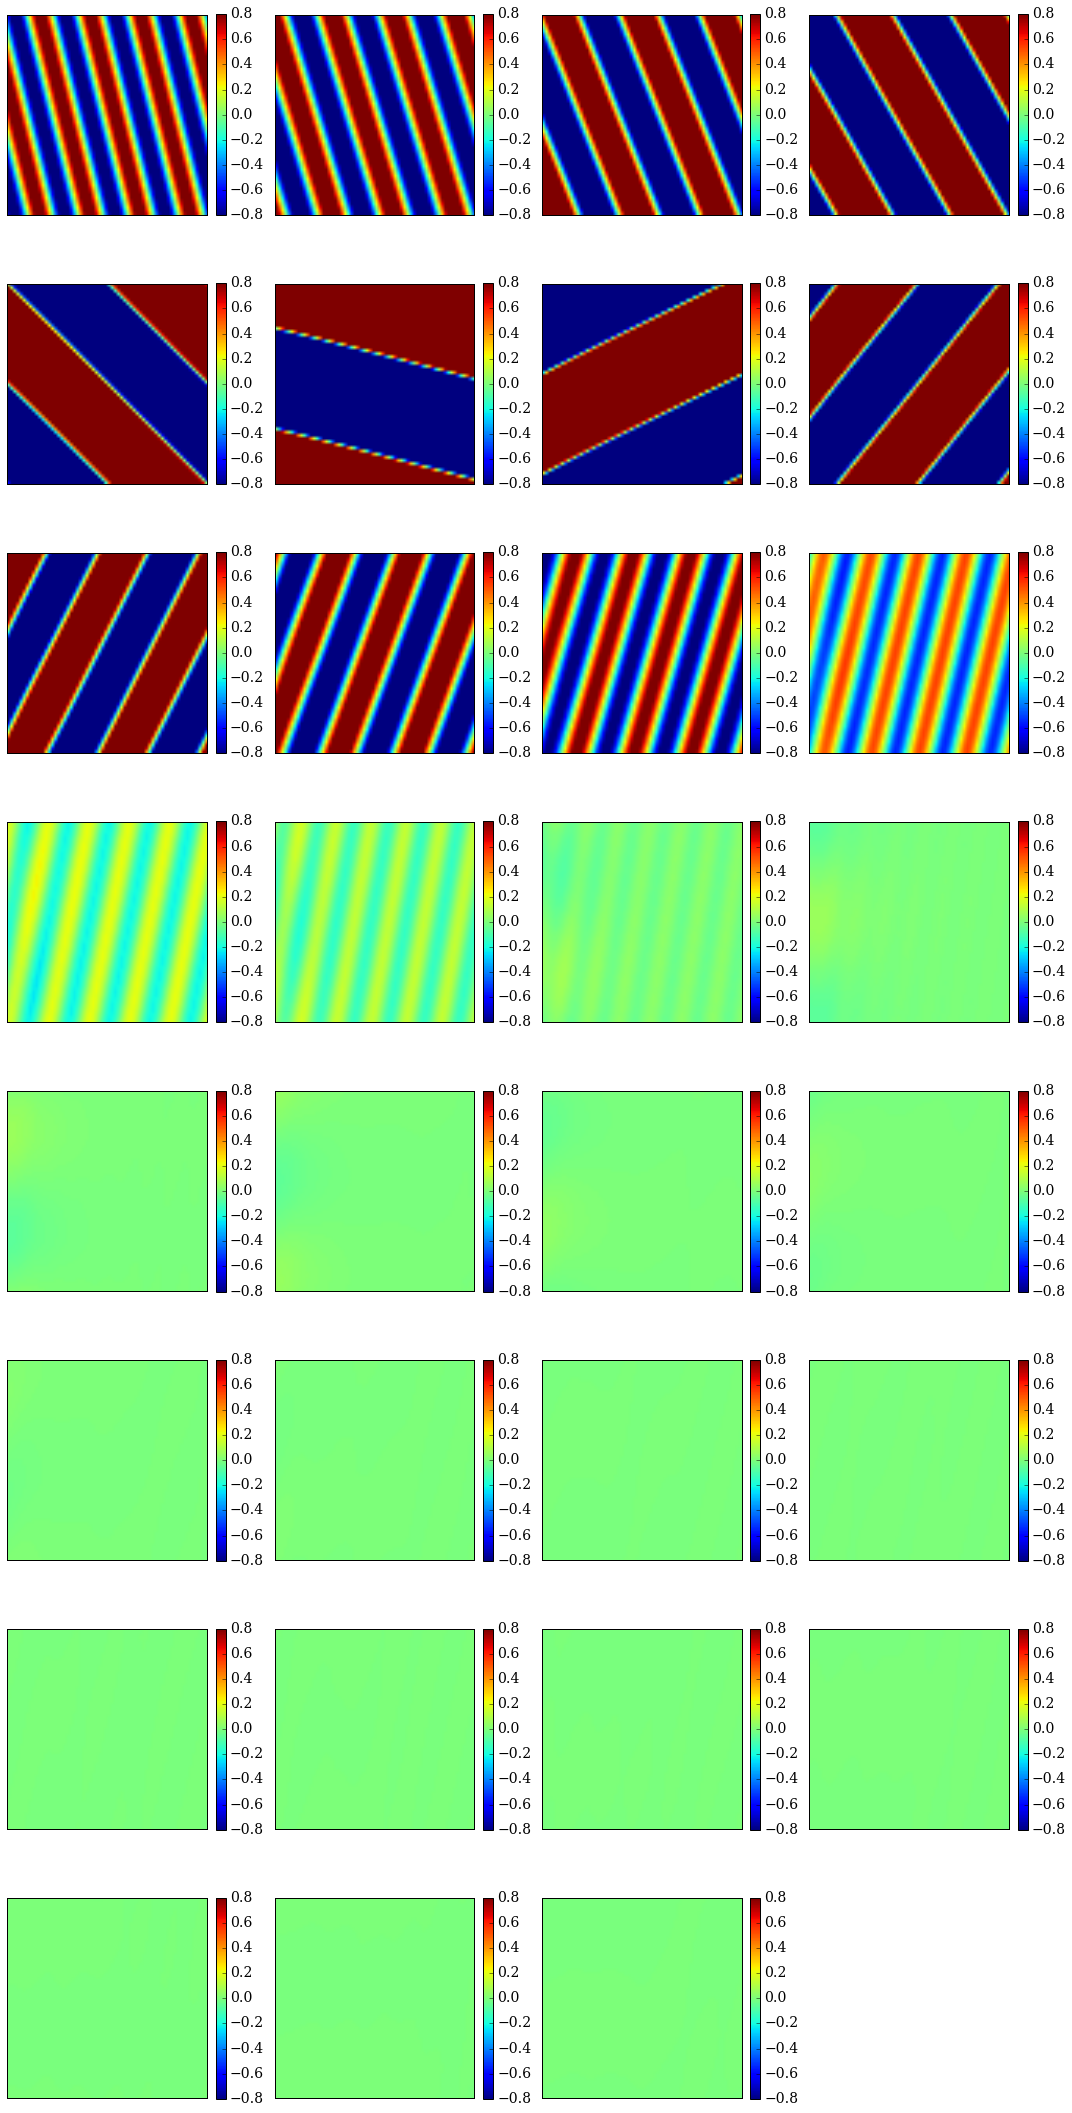

In [24]:
import athena_read  as ath
from shwave import cn4, cn5
# load snapshots and save to png
ts=0; te=31
#targ='../develop/bin/shwave.r64/'
targ='../athena/bin/shwave.r128/'
q = 1.5; omg = 1e-3; cs=0.001
nplot = te - ts + 1
cnt = 1
ngrid_y = 4
ngrid_x = nplot/4+1
pylab.rcParams['figure.figsize'] = (15, 15.0*ngrid_x/ngrid_y)
fraction=0.046; pad=0.04
bbmax=0.8
for i in np.arange(ts,te,1):
  #filename=targ+'sst.block0.out2.'+cn5(i)+'.vtk'
  filename=targ+'shwave.'+cn5(i)+'.vtk'
  trunk = ath.vtk(filename)
  t = trunk[0]
  x = trunk[1]
  y = trunk[2]
  vel = trunk[4]['vel']
  xb = x[0:68]+(x[1]-x[0])*0.5
  velx = vel[0,2:66,2:66,0]
  vely = vel[0,2:66,2:66,1]
  dvely = vel[0,2:66,2:66,1] + np.resize(q*omg*xb[2:66],(64,64))
  #rho = data['rho']
  plt.subplot(ngrid_x,ngrid_y,cnt)
  plt.imshow(velx/cs*1e4,clim=[-bbmax,bbmax])
  plt.xticks([])
  plt.yticks([])
  plt.colorbar(fraction=fraction, pad=pad)
  cnt += 1

plt.tight_layout()
plt.show()
pylab.rcParams['figure.figsize'] = (15, 15.0)

# II. test epicyclic motion 
## 1. using athena4
good epicyclic energy conservation over hundred orbits even for wide box

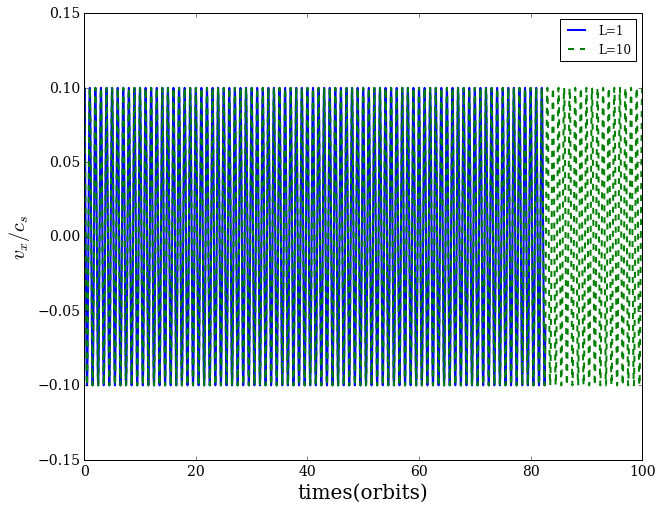

In [50]:
time,dt,mass,m1,m2,m3,k1,k2,k3,tmp1,tmp2 = np.loadtxt('../athena4.0/epicyclic/sst.hst.L1',unpack=True)
plt.plot(time/2/np.pi/1000.,m1/mass*1000.,linewidth=2)

time,dt,mass,m1,m2,m3,k1,k2,k3,tmp1,tmp2 = np.loadtxt('../athena4.0/epicyclic/sst.hst',unpack=True)
plt.plot(time/2/np.pi/1000.,m1/mass*1000.,'g--')

plt.xlabel('times(orbits)',fontsize=20)
plt.ylabel('$v_x/c_s$',fontsize=20)
plt.ylim([-0.15,0.15])
plt.xlim([0,100])
plt.legend(['L=1','L=10'])
plt.show()

## 2. Athena++ operator split
good conservation for both small and big box

[  0.00000000e+00  -3.72787000e-05  -7.45536000e-05  -1.11823000e-04
  -1.49084000e-04  -1.86335000e-04  -2.23575000e-04  -2.60800000e-04
  -2.98009000e-04  -3.35200000e-04  -3.72370000e-04  -4.09519000e-04
  -4.46643000e-04  -4.83740000e-04  -5.20809000e-04  -5.57847000e-04
  -5.94853000e-04  -6.31824000e-04  -6.68759000e-04  -7.05654000e-04
  -7.42509000e-04  -7.79321000e-04  -8.16089000e-04  -8.52809000e-04
  -8.89480000e-04  -9.26101000e-04  -9.62668000e-04  -9.99181000e-04
  -1.03564000e-03  -1.07203000e-03  -1.10837000e-03  -1.14464000e-03
  -1.18085000e-03  -1.21699000e-03  -1.25306000e-03  -1.28906000e-03
  -1.32499000e-03  -1.36084000e-03  -1.39662000e-03  -1.43231000e-03
  -1.46793000e-03  -1.50346000e-03  -1.53891000e-03  -1.57427000e-03
  -1.60954000e-03  -1.64473000e-03  -1.67982000e-03  -1.71481000e-03
  -1.74971000e-03  -1.78451000e-03  -1.81921000e-03  -1.85381000e-03
  -1.88830000e-03  -1.92269000e-03  -1.95697000e-03  -1.99114000e-03
  -2.02520000e-03  -2.05915000e-03

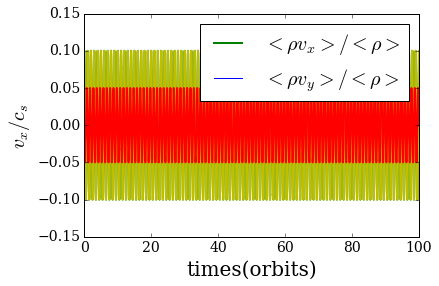

In [46]:
#time,dt,mass,m1,m2,m3,k1,k2,k3,tmp1,tmp2,tmp3 = np.loadtxt('../develop/bin/epicyclic.L1/sst.hst',unpack=True)
#plt.plot(time/2/np.pi/1000.,m1/mass*1000.,linewidth=2)

## athena++ 2d   /develop/
time,dt,mass,m1,m2,m3,k1,k2,k3,tmp1,tmp2,tmp3 = np.loadtxt('../develop/bin/epicyclic.L10/sst.hst',unpack=True)
plt.plot(time/2/np.pi/1000.,m1/mass*1000.,'g-')
plt.plot(time/2/np.pi/1000.,m2/mass*1000.,'b-',linewidth=1)

## athena++ 3d    /athena/
time_3d,dt_3d,mass_3d,m1_3d,m2_3d,m3_3d,k1,k2,k3,tmp1,tmp2,tmp3 = np.loadtxt('../athena/bin/epicyclic.L10/sst.hst',unpack=True)
plt.plot(time_3d/2/np.pi/1000.,m1_3d/mass_3d*1000.,'y-',linewidth=2)
plt.plot(time_3d/2/np.pi/1000.,m2_3d/mass_3d*1000.,'r-',linewidth=2)
print m2_3d[:100]

plt.xlabel('times(orbits)',fontsize=20)
plt.ylabel('$v_x/c_s$',fontsize=20)
plt.ylim([-0.15,0.15])
plt.xlim([0,100])
#plt.legend(['L=1','L=10'])
plt.legend([r'$< \rho v_x>/< \rho >$',r'$< \rho v_y>/< \rho>$'], fontsize=20)
plt.show()

the error in vy is due to some initial kick of vy!!   it should be just zero !! but somehow the initial value is not and very large too.

In [40]:
a = m1_3d/mass_3d*1000.
b = m2_3d/mass_3d*1000.
print a[:100]
print b[:100]

[ 0.1         0.1         0.1         0.1         0.09999832  0.09999832
  0.09999832  0.09999832  0.09999384  0.09999384  0.09999384  0.09999384
  0.099986    0.099986    0.099986    0.099986    0.0999748   0.0999748
  0.0999748   0.0999748   0.0999608   0.0999608   0.0999608   0.0999608
  0.099944    0.099944    0.099944    0.099944    0.09992328  0.09992328
  0.09992328  0.09992328  0.09989976  0.09989976  0.09989976  0.09989976
  0.09987344  0.09987344  0.09987344  0.09987344  0.09984376  0.09984376
  0.09984376  0.09984376  0.09981072  0.09981072  0.09981072  0.09981072
  0.09977488  0.09977488  0.09977488  0.09977488  0.09973624  0.09973624
  0.09973624  0.09973624  0.09969368  0.09969368  0.09969368  0.09969368
  0.09964888  0.09964888  0.09964888  0.09964888  0.09960016  0.09960016
  0.09960016  0.09960016  0.09954864  0.09954864  0.09954864  0.09954864
  0.09949432  0.09949432  0.09949432  0.09949432  0.09943664  0.09943664
  0.09943664  0.09943664  0.0993756   0.0993756   0.0

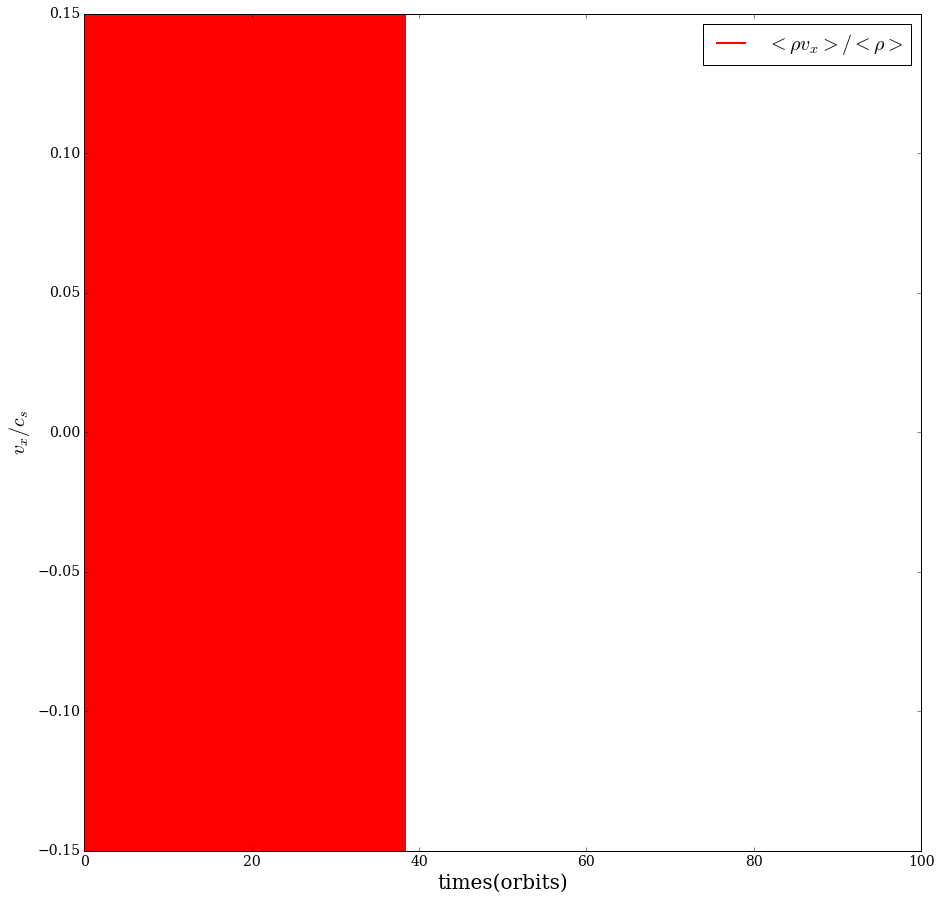

In [39]:
matplotlib.rcParams['agg.path.chunksize'] = 10000

plt.plot(time_3d/2/np.pi/1000.,m2_3d/mass_3d*1000.,'r-',linewidth=2)
plt.xlabel('times(orbits)',fontsize=20)
plt.ylabel('$v_x/c_s$',fontsize=20)
plt.ylim([-0.15,0.15])
plt.xlim([0,100])
#plt.legend(['L=1','L=10'])
plt.legend([r'$< \rho v_x>/< \rho >$',r'$< \rho v_y>/< \rho>$'], fontsize=20)
plt.show()

plt.show()

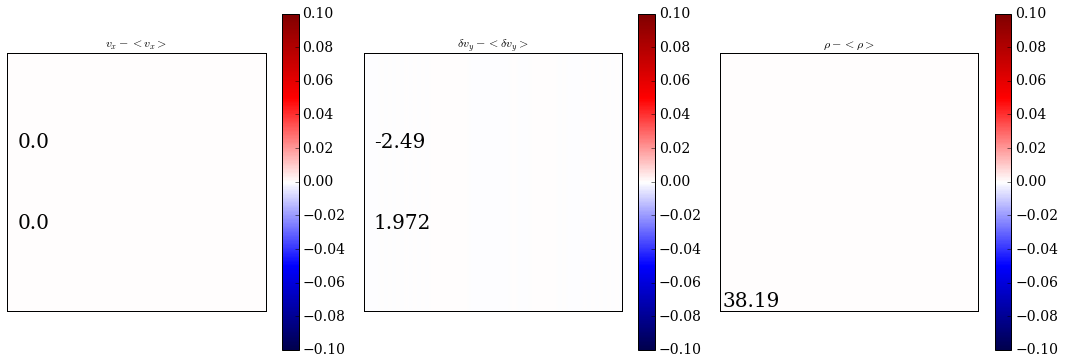

In [20]:

targ='../develop/bin/epicyclic.L10/'
ts=24; te=25; stride=2
q = 1.5; omg = 1e-3; cs = 1e-3
nplot = te - ts + 1
#ngrid = int(np.sqrt(nplot))
ngrid_y = 3
ngrid_x = nplot
cnt = 1
pylab.rcParams['figure.figsize'] = (15, 15.0*ngrid_x/ngrid_y)

for i in np.arange(ts,te,1):
  filename=targ+'sst.block0.out2.'+cn5(i)+'.vtk'
  trunk = ath.vtk(filename)
  t = trunk[0]
  x = trunk[1]
  y = trunk[2]
  vel = trunk[4]['vel']/cs
  rho = trunk[4]['rho']
  xb = x[0:68]+(x[1]-x[0])*0.5
  velx = vel[0,2:66,2:66,0]
  vely = vel[0,2:66,2:66,1]
  rhod = rho[0,2:66,2:66]
  dvely = vel[0,2:66,2:66,1] + np.resize(q*omg/cs*xb[2:66],(64,64))
  
  # plot velx
  plt.subplot(ngrid_x,ngrid_y,cnt)
  bavg = np.average(velx)
  velx = velx - bavg
  #bbmax=np.max([np.abs(np.min(velx)), np.max(velx)])
  bbmax = 0.1
  plt.imshow(velx,cmap=plt.get_cmap('seismic'),clim=[-bbmax,bbmax],origin='lower')
  plt.xticks([])
  plt.yticks([])
  plt.colorbar() 
  plt.text(2,40,str(np.min(velx))[0:5],fontsize=20)
  plt.text(2,20,str(np.max(velx))[0:5],fontsize=20)
  if (i==ts):
    plt.title(r'$v_x-<v_x>$')
  cnt += 1
  
  # plot dvely
  plt.subplot(ngrid_x,ngrid_y,cnt)
  bavg = np.average(dvely)
  dvely = dvely - bavg
  bbmax = 0.1  
  #bbmax=np.max([np.abs(np.min(dvely)), np.max(dvely)])
  plt.imshow(dvely,cmap=plt.get_cmap('seismic'),clim=[-bbmax,bbmax],origin='lower')
  plt.xticks([])
  plt.yticks([])
  plt.colorbar()
  plt.text(2,40,str(np.min(dvely))[0:5],fontsize=20)
  plt.text(2,20,str(np.max(dvely))[0:5],fontsize=20)
  if (i==ts):
    plt.title(r'$\delta v_y-<\delta v_y>$')
  cnt += 1
  
  # plot rho
  plt.subplot(ngrid_x,ngrid_y,cnt)
  drho = rhod - np.average(rhod)
  bbmax=np.max([np.abs(np.min(drho)), np.max(drho)])
  bbmax = 0.1
  plt.imshow(drho,cmap=plt.get_cmap('seismic'),clim=[-bbmax,bbmax],origin='lower')
  plt.xticks([])
  plt.yticks([])
  plt.colorbar()
  plt.text(0,0.5,str(t/1000./(2*np.pi))[0:5],fontsize=20)
  if (i==ts):
    plt.title(r'$\rho-<\rho>$')
  cnt += 1
  

plt.tight_layout()
plt.show()

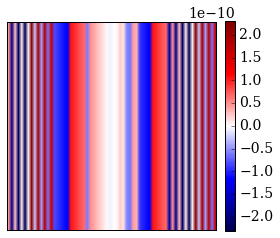

In [21]:
pylab.rcParams['figure.figsize'] = (15.0, 15.0)
ts=15; te=16; targ='../develop/bin/epicyclic.L10/'
q = 1.5; omg = 1e-3
nplot = te - ts + 1
#ngrid = int(np.sqrt(nplot))
ngrid_y = 4
ngrid_x = nplot/4+1
cnt = 1
fraction=0.046; pad=0.04
for i in np.arange(ts,te,1):
  filename=targ+'sst.block0.out2.'+cn5(i)+'.vtk'
  trunk = ath.vtk(filename)
  t = trunk[0]
  x = trunk[1]
  y = trunk[2]
  vel = trunk[4]['vel']
  xb = x[0:68]+(x[1]-x[0])*0.5
  velx = vel[0,2:66,2:66,0]
  vely = vel[0,2:66,2:66,1]
  dvely = vel[0,2:66,2:66,1] + np.resize(q*omg*xb[2:66],(64,64))
  #rho = data['rho']
  plt.subplot(ngrid_x,ngrid_y,cnt)
  bavg = np.average(dvely)
  bbmax=np.max([np.abs(np.min(dvely-bavg)), np.max(dvely-bavg)])
  #print bbmax
  plt.imshow(dvely-bavg,cmap=plt.get_cmap('seismic'),clim=[-bbmax,bbmax])
  plt.xticks([])
  plt.yticks([])
  plt.colorbar(fraction=fraction, pad=pad)
  cnt += 1
  print 
plt.tight_layout()
plt.show()